<a href="https://colab.research.google.com/github/badabad/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')
print(df.shape)
df.head()

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [ ]:
rs1 = df.sample(20,random_state=42)
rs2 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [ ]:
rs1_mean = rs1['ConvertedSalary'].mean()
print(rs1_mean)
rs2_mean = rs2['ConvertedSalary'].mean()
print(rs2_mean)

55752.2
68551.255


In [ ]:
r= rs1['ConvertedSalary']
r.head(21)

367      74500.0
2759     60000.0
1330     86120.0
2750     60000.0
521      25047.0
819      10704.0
322     150000.0
1970     41124.0
365     135000.0
2512     62600.0
1973      6348.0
533      62507.0
2060     31309.0
807      42635.0
2724     14687.0
239      64417.0
2261      9600.0
2233     40196.0
1688      9706.0
1268    128544.0
Name: ConvertedSalary, dtype: float64

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I would trust the second sample more. Smaller sample sizes are more likely to be inaccurate because they can be thrown off by anomalies. I'm pretty sure even a non technical audience would choose the larger sample size

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Yes, the sample with 20 vs the sample with 200 are vastly different

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



Non-technical readers would be more convinced if they saw visuals- i.e. a graph
We could also calculate percent difference

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [ ]:
def CI(data, confidence=.95):
  #calculate confidence interval
  sample = np.array(data)
  s = np.std(sample, ddof=1)
  n = np.size(sample)
  standard_error = s/np.sqrt(n)
  t = stats.t.ppf((1+confidence)/2, n-1)
  #margin of error
  MOE = t*standard_error
  xbar = np.mean(sample)
  lower = xbar-MOE
  upper = xbar+MOE
  return(lower,xbar,upper, MOE)

In [ ]:
CI(rs1['ConvertedSalary'], .95)

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [ ]:
CI(rs2['ConvertedSalary'], .95)

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [ ]:
print(CI(rs1['ConvertedSalary'])[3])
print("margin of error for sample 1 is " + "19947")
print('margin of error for sample 2 is ' + '7958')
print('mean of sample 1 is ' + str(rs1_mean))
print('mean of sample 2 is ' + str(rs2_mean))

19947.096903744638
margin of error for sample 1 is 19947
margin of error for sample 2 is 7958
mean of sample 1 is 55752.2
mean of sample 2 is 68551.255


## Margin of error is just a measure of how inaccurate the results could be. A margin of error indicates how much the real results could vary from what we calculated

The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

<ErrorbarContainer object of 3 artists>

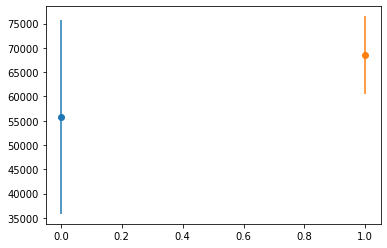

In [ ]:
import matplotlib.pyplot as plt

plt.errorbar(0, rs1_mean, yerr= 19947, fmt='o')
plt.errorbar(1, rs2_mean, yerr=7958, fmt='o')

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

<function matplotlib.pyplot.show>

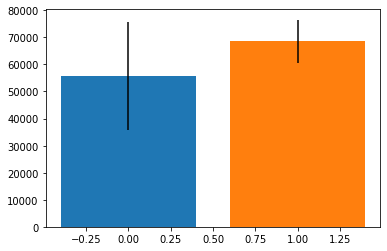

In [ ]:
plt.bar(0, rs1_mean, yerr=19947)
plt.bar(1, rs2_mean, yerr=7958)
plt.show

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [ ]:
CI(df['ConvertedSalary'], .95)

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

The results get very precise. The confidence interval is much smaller given that the entire population was used

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**



Precision is a measure of how similar your results are to each other. Accuracy is a measure of how close to the actual value you get



**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

A 95% confidence interval will capture 95% of sample means

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.